In [1]:
import rawpy
import numpy as np
from scipy.ndimage.filters import convolve

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["figure.figsize"] = 10, 15

In [2]:
H_G = np.asarray(
        [[0, 1, 0],
         [1, 4, 1],
         [0, 1, 0]], dtype=np.float64 ) / 4

H_RB = np.asarray(
    [[1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]], dtype=np.float64) / 4

In [3]:
import glob

raws = []
rpyraws = []
for i in sorted(glob.glob("../../tmp/*.NEF"))[77:115]:
    print(i)
    raw = rawpy.imread(i)
    rpyraws.append(raw)
    imcopy = raw.raw_image_visible.copy()
    pog = np.concatenate((
        convolve((imcopy*(raw.raw_colors_visible==0)), H_RB)[:,:,np.newaxis],
        convolve((imcopy*(raw.raw_colors_visible==1)), H_G)[:,:,np.newaxis],
        convolve((imcopy*(raw.raw_colors_visible==2)), H_RB)[:,:,np.newaxis],
    ), axis=2)
    
    raws.append(pog)
raws=np.asarray(raws)
raws

../../tmp/DSC_0078.NEF
../../tmp/DSC_0079.NEF
../../tmp/DSC_0080.NEF
../../tmp/DSC_0081.NEF
../../tmp/DSC_0082.NEF
../../tmp/DSC_0083.NEF
../../tmp/DSC_0084.NEF
../../tmp/DSC_0085.NEF
../../tmp/DSC_0086.NEF
../../tmp/DSC_0087.NEF
../../tmp/DSC_0088.NEF
../../tmp/DSC_0089.NEF
../../tmp/DSC_0090.NEF
../../tmp/DSC_0091.NEF
../../tmp/DSC_0092.NEF
../../tmp/DSC_0093.NEF
../../tmp/DSC_0094.NEF
../../tmp/DSC_0095.NEF
../../tmp/DSC_0096.NEF
../../tmp/DSC_0097.NEF
../../tmp/DSC_0098.NEF
../../tmp/DSC_0099.NEF
../../tmp/DSC_0100.NEF
../../tmp/DSC_0101.NEF
../../tmp/DSC_0102.NEF


array([[[[ 69,  15,  11],
         [ 48,  78,  23],
         [ 51,  30,  23],
         ...,
         [ 49,  77,  26],
         [ 52,  31,  26],
         [ 26,  97,  41]],

        [[ 45,   0,  23],
         [ 32,  29,  46],
         [ 34,   0,  47],
         ...,
         [ 33,  32,  52],
         [ 35,   0,  53],
         [ 17,  33,  82]],

        [[ 43,  14,  22],
         [ 31,  56,  44],
         [ 34,  29,  45],
         ...,
         [ 33,  66,  51],
         [ 36,  33,  51],
         [ 18,  83,  75]],

        ...,

        [[ 42,   0,  23],
         [ 28,  28,  46],
         [ 27,   0,  44],
         ...,
         [ 33,  33,  50],
         [ 33,   0,  50],
         [ 16,  31,  76]],

        [[ 43,  12,  22],
         [ 28,  50,  44],
         [ 27,  26,  44],
         ...,
         [ 32,  67,  49],
         [ 34,  32,  49],
         [ 17,  78,  75]],

        [[ 21,   0,  31],
         [ 14,  12,  63],
         [ 13,   0,  65],
         ...,
         [ 16,  16,  72],
        

In [4]:
rawsgamma = raws ** (1/2.4)
print("gammacc")

gammacc


In [5]:

pogawbb = np.percentile(rawsgamma[:,::10,::10], 10, (0, 1, 2))
pogawbw = np.percentile(rawsgamma[:,::10,::10], 99, (0, 1, 2))
print("wbcalc")
# pogawbb = np.percentile(raws, 1, (0, 1, 2))
# pogawbw = np.percentile(raws, 99, (0, 1, 2))

wbcalc


1.6174400519901648 -0.6619060746003177
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.6174400519901648 -0.6200374789190163
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.6174400519901648 -0.6429268150247416
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.6174400519901648 -1.4027147942439169
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


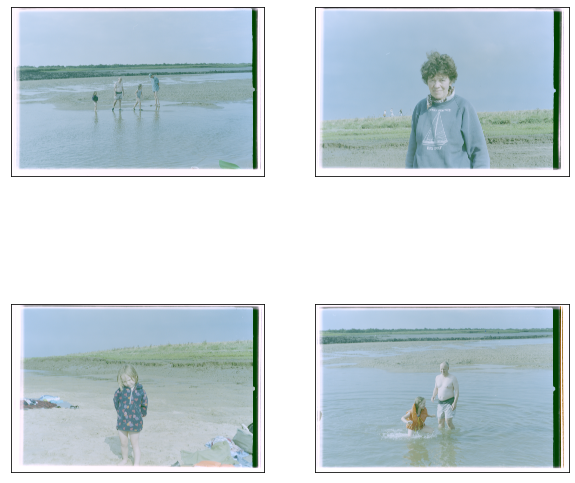

In [6]:
# plt.imshow(n[0][0].permute(1, 2, 0))
plt.figure(figsize=(10,10))
# pogawbb = np.percentile(raws, 1, (0, 1, 2))
# pogawbw = np.percentile(raws, 99, (0, 1, 2))
# print("wbs calc")
number = 4
offset = 14
for i in range(len(raws))[:number]:
    gridsize = number**0.5//1+(number**0.5%1>0)*1
    plt.subplot(gridsize, gridsize,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    pog = rawsgamma[i + offset] 
    
    # pogmed = np.median(pog, (0, 1))
    # print(i)
    toshow = (pog[::,::]-pogawbw)/(pogawbb-pogawbw)
    print(toshow.max(), toshow.min())
    plt.imshow(toshow*[1, 1, 1])
    # plt.xlabel(class_names[n[1][i]])